In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

## Input data

Grades for two groups of students labeled S and A, plus a version where we copy each student three times just to see how would p-values change if we had more data.

In [ ]:
mids = [52.5, 52.5, 25.5, 32.5, 29.0, 52.0, 41.5, 31.0, 23.0, 46.0,
        58.0, 27.5, 14.5, 64.0, 26.5, 56.0, 28.0, 8.5, 17.5, 49.5, 37.5,
        47.5, 62.5, 50.0, 37.0, 19.0, 28.0, 80.0, 32.5]

mida = [61.0, 21.0, 42.5, 37.5, 47.0, 55.5, 53.5, 24.0, 34.0,
        43.0, 41.5, 71.0, 55.0, 49.0]

mids3 = mids * 3
mida3 = mida * 3

## Visualization

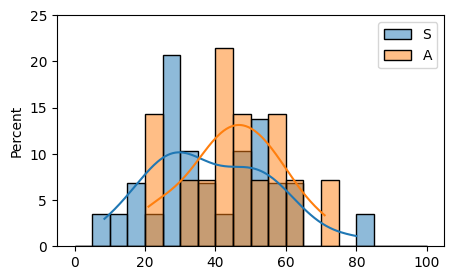

In [ ]:
figure, axes = plt.subplots(figsize=(5,3))
sns.histplot(data=mids, stat='percent', binwidth=5, binrange=[0,100],
             kde=True, label='S', ax=axes)
sns.histplot(data=mida, stat='percent', binwidth=5, binrange=[0,100],
             kde=True, label='A', ax=axes)
axes.set_ylim(0,25)
axes.legend()
pass

## Outlier

One student from a third group (not shown above) has grade 88.5. What is the p-value of such a high grade in the normal distribution fitted to the combined groups?

**Normal fit:**

(41.04651162790697, 15.890546390085087)

**P-value of 88.5: 0.0014120082414978974**

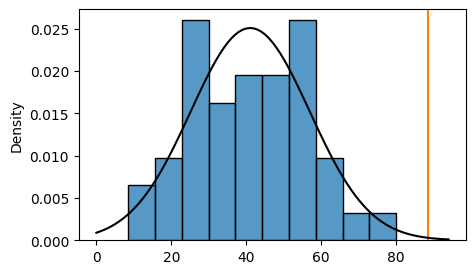

In [ ]:
# fitted parameters
parameters = st.norm.fit(mids + mida)
display(Markdown("**Normal fit:**"), parameters)

# p-value
grade = 88.5
pval = 1 - st.norm.cdf(grade, loc=parameters[0], scale=parameters[1])
display(Markdown(f"**P-value of {grade}: {pval}**"))

# plotting
# get function values for regularly distributed x values
x = np.arange(0, 95, 1)
pdf_fitted = st.norm.pdf(x, loc=parameters[0], scale=parameters[1])
# plot histogram, normalized as density (area=1)
figure, axes = plt.subplots(figsize=(5,3))
sns.histplot(x=(mids + mida), stat='density', bins=10, ax=axes)
axes.axvline(grade, color='C1')
# add a line for fitted density
axes.plot(x, pdf_fitted, 'k-')
pass

## Fisher exact test

We split students into pass group (grade at least 40) and fail group. Is this split independent of the split into groups S and A?

In [ ]:
def count(grades, threshold):
  n = len(grades)
  passed = len([x for x in grades if x >= threshold])
  return pd.Series({'pass':passed, 'fail':n - passed})

def run_fisher(name1, list1, name2, list2, threshold=40):
  display(Markdown(f"### Fisher exact test of passing chance {name1} vs {name2}:"))
  contingency_table = pd.DataFrame({name1:count(list1, threshold),
                                    name2:count(list2, threshold)})
  display(contingency_table)
  result = st.fisher_exact(contingency_table, alternative='less')
  display(result)
  display(Markdown(f"**P-value: {result.pvalue}**"))

run_fisher('S', mids, 'A', mida)
run_fisher('Sx3', mids3, 'Ax3', mida3)

### Fisher exact test of passing chance S vs A:

S   A
pass  13  10
fail  16   4

SignificanceResult(statistic=0.325, pvalue=0.09396605908233813)

**P-value: 0.09396605908233813**

### Fisher exact test of passing chance Sx3 vs Ax3:

Sx3  Ax3
pass   39   30
fail   48   12

SignificanceResult(statistic=0.325, pvalue=0.0037152178933427386)

**P-value: 0.0037152178933427386**

## Welch's t-test

Assumes both groups are normally distributed.

In [ ]:
def run_welch(name1, list1, name2, list2):
  result = st.ttest_ind(list1, list2, equal_var=False, alternative='less')
  display(Markdown(f"## Welch's t-test {name1} vs {name2}:"), result)
  display(Markdown(f"**P-value: {result.pvalue}**"))

run_welch('S', mids, 'A', mida)
run_welch('Sx3', mids3, 'Ax3', mida3)

## Welch's t-test S vs A:

TtestResult(statistic=-1.3342708627796347, pvalue=0.0958769118116121, df=31.260698250020088)

**P-value: 0.0958769118116121**

## Welch's t-test Sx3 vs Ax3:

TtestResult(statistic=-2.356200688569062, pvalue=0.010214448741161942, df=99.20331270196249)

**P-value: 0.010214448741161942**

## Mann-Whitney U rank test

In [ ]:
def run_mw(name1, list1, name2, list2):
  result = st.mannwhitneyu(list1, list2, alternative='less')
  display(Markdown(f"### Mann-Whitney U rank test {name1} vs {name2}:"))
  display(result)
  display(Markdown(f"**P-value: {result.pvalue}**"))

run_mw('S', mids, 'A', mida)
run_mw('Sx3', mids3, 'Ax3', mida3)

### Mann-Whitney U rank test S vs A:

MannwhitneyuResult(statistic=154.0, pvalue=0.10432980243922091)

**P-value: 0.10432980243922091**

### Mann-Whitney U rank test Sx3 vs Ax3:

MannwhitneyuResult(statistic=1386.0, pvalue=0.013381209353969097)

**P-value: 0.013381209353969097**

## Kolmogorov-Smirnov test for goodness of fit

### Kolmogorov-Smirnov test for goodness of fit S vs A:

KstestResult(statistic=0.3399014778325123, pvalue=0.1653686592481871, statistic_location=32.5, statistic_sign=1)

**P-value: 0.1653686592481871**

### Kolmogorov-Smirnov test for goodness of fit Sx3 vs Ax3:

KstestResult(statistic=0.3399014778325123, pvalue=0.0020026144714577676, statistic_location=32.5, statistic_sign=1)

**P-value: 0.0020026144714577676**

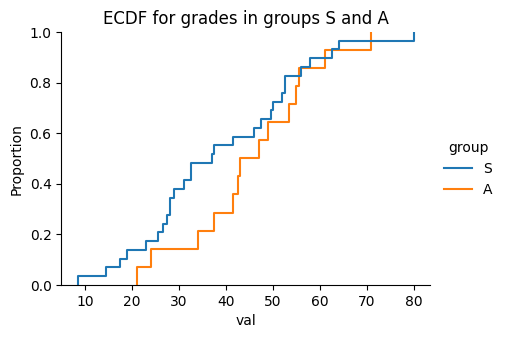

In [ ]:
def run_ks(name1, list1, name2, list2):
  result = st.kstest(list1, list2, alternative='two-sided')
  display(Markdown(f"### Kolmogorov-Smirnov test for goodness of fit {name1} vs {name2}:"))
  display(result)
  display(Markdown(f"**P-value: {result.pvalue}**"))

# run the tests
run_ks('S', mids, 'A', mida)
run_ks('Sx3', mids3, 'Ax3', mida3)

def make_dataframe(name1, list1, name2, list2):
  """Creates a dataframe with a row per student
  where grades are in column val and group names are column group"""
  return pd.DataFrame({'val':list1 + list2,
                    'group':[name1] * len(list1) + [name2] * len(list2)})

# visualize emipirical cumulative distribution functions
tab = make_dataframe('S', mids, 'A', mida)
grid = sns.displot(tab, x="val", hue="group", kind="ecdf")
grid.axes[0,0].set_title(f"ECDF for grades in groups S and A")
grid.figure.set_size_inches(5, 3)
pass

## Permutation test

We test difference in medians.

## Permutation test for difference of medians S vs A:

**P-value: 0.2155**

## Permutation test for difference of medians Sx3 vs Ax3:

**P-value: 0.085**

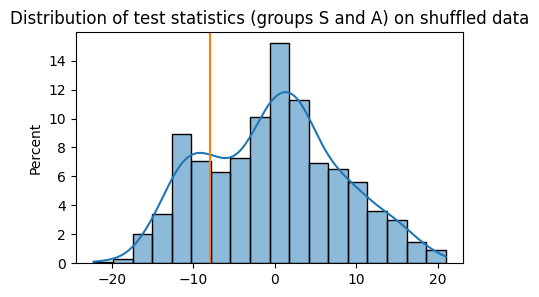

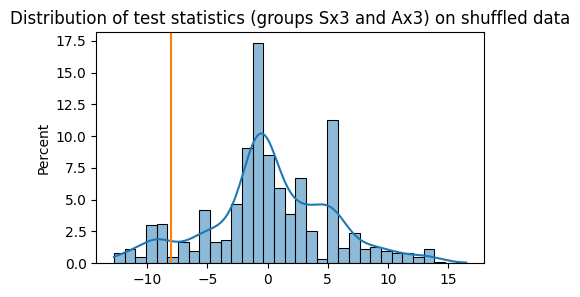

In [ ]:
def eval_tab(tab, name):
  """Compute the test statistics.
  In the input dataframe computes medians of column val
  for rows with value name in column group and for the remaining rows.
  Returms the difference of these medians."""
  med1 = tab.query('group == @name')['val'].median()
  med2 = tab.query('group != @name')['val'].median()
  return med1 - med2

def shuffled_val(tab, name):
  """Randomly shuffle group labels in the input dataframe and compute
  the test statistics using eval_tab"""
  shuffled = np.array(tab['group'])
  np.random.shuffle(shuffled)
  shuffled_tab = pd.DataFrame({'val':tab['val'], 'group':shuffled})
  shuffled_val = eval_tab(shuffled_tab, name)
  return shuffled_val

def run_perm(name1, list1, name2, list2, n_samples=1000):
  # create dataframe
  tab = make_dataframe(name1, list1, name2, list2)
  # compute test statistics for real data
  true_val = eval_tab(tab, name1)
  # compute a list of test statistics for n_smaples permuted tables
  shuffled_vals = [shuffled_val(tab, name1) for rep in range(n_samples)]
  # compute percentile rank of real statistics amnong shuffled ones
  result = st.percentileofscore(shuffled_vals, true_val)
  display(Markdown(f"## Permutation test for difference of medians {name1} vs {name2}:"))
  # plot distribution of test statistics on shuffled data
  (figure, axes) = plt.subplots(figsize=(5,3))
  sns.histplot(data=shuffled_vals, stat='percent', kde=True, ax=axes)
  axes.axvline(true_val, color='C1')
  axes.set_title(f"Distribution of test statistics (groups {name1} and {name2}) on shuffled data")
  figure.show()
  display(Markdown(f"**P-value: {result / 100}**"))


run_perm('S', mids, 'A', mida)
run_perm('Sx3', mids3, 'Ax3', mida3)